Bhubaneswar Surface Temperature Forecasting

TTL project

In [94]:
import numpy as np

In [95]:
import pandas as pd

In [122]:
df=pd.read_csv('data.csv')
df

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,1990-01-01,20.1,NaN,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01-02,20.7,16.4,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-01-03,20.7,16.0,27.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-01-04,18.8,NaN,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-01-05,19.8,11.0,28.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11930,2022-08-31,29.2,26.3,33.0,9.0,NaN,186.0,8.2,NaN,1006.6,NaN
11931,2022-09-01,29.6,27.0,33.0,2.1,NaN,190.0,9.5,NaN,1006.8,NaN
11932,2022-09-02,29.7,26.3,33.0,3.3,NaN,198.0,9.5,NaN,1007.3,NaN
11933,2022-09-03,29.2,26.1,34.0,9.7,NaN,215.0,8.5,NaN,1005.5,NaN


In [123]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11935 entries, 0 to 11934
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    11935 non-null  object 
 1   tavg    11857 non-null  float64
 2   tmin    9845 non-null   float64
 3   tmax    11044 non-null  float64
 4   prcp    6838 non-null   float64
 5   snow    0 non-null      float64
 6   wdir    1294 non-null   float64
 7   wspd    2129 non-null   float64
 8   wpgt    0 non-null      float64
 9   pres    1243 non-null   float64
 10  tsun    0 non-null      float64
dtypes: float64(10), object(1)
memory usage: 1.0+ MB


In [124]:
data=df.copy()

In [125]:
data['Date'] = pd.to_datetime(data['time'])

In [126]:
data.set_index(data['Date'], inplace = True)
data.index

DatetimeIndex(['1990-01-01', '1990-01-02', '1990-01-03', '1990-01-04',
               '1990-01-05', '1990-01-06', '1990-01-07', '1990-01-08',
               '1990-01-09', '1990-01-10',
               ...
               '2022-08-26', '2022-08-27', '2022-08-28', '2022-08-29',
               '2022-08-30', '2022-08-31', '2022-09-01', '2022-09-02',
               '2022-09-03', '2022-09-04'],
              dtype='datetime64[ns]', name='Date', length=11935, freq=None)

In [127]:
data

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,Date
Date,,,,,,,,,,,,
1990-01-01,1990-01-01,20.1,NaN,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1990-01-01
1990-01-02,1990-01-02,20.7,16.4,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1990-01-02
1990-01-03,1990-01-03,20.7,16.0,27.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1990-01-03
1990-01-04,1990-01-04,18.8,NaN,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1990-01-04
1990-01-05,1990-01-05,19.8,11.0,28.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1990-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,2022-08-31,29.2,26.3,33.0,9.0,NaN,186.0,8.2,NaN,1006.6,NaN,2022-08-31
2022-09-01,2022-09-01,29.6,27.0,33.0,2.1,NaN,190.0,9.5,NaN,1006.8,NaN,2022-09-01
2022-09-02,2022-09-02,29.7,26.3,33.0,3.3,NaN,198.0,9.5,NaN,1007.3,NaN,2022-09-02


In [128]:
df.columns

Index(['time', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt',
       'pres', 'tsun'],
      dtype='object')

In [129]:
cols=['time', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt','pres', 'tsun']
data.drop(cols, axis = 1, inplace = True)
data.head()

,tavg,Date
Date,,
1990-01-01,20.1,1990-01-01
1990-01-02,20.7,1990-01-02
1990-01-03,20.7,1990-01-03
1990-01-04,18.8,1990-01-04
1990-01-05,19.8,1990-01-05


In [130]:
data=data.drop(['Date'], axis=1)


In [131]:
data['AverageTemperature'] = data['tavg']

In [132]:
data.head()

,tavg,AverageTemperature
Date,,
1990-01-01,20.1,20.1
1990-01-02,20.7,20.7
1990-01-03,20.7,20.7
1990-01-04,18.8,18.8
1990-01-05,19.8,19.8


In [133]:
data=data.drop(['tavg'], axis=1)

In [134]:
data.head()

,AverageTemperature
Date,
1990-01-01,20.1
1990-01-02,20.7
1990-01-03,20.7
1990-01-04,18.8
1990-01-05,19.8


In [135]:
data

,AverageTemperature
Date,
1990-01-01,20.1
1990-01-02,20.7
1990-01-03,20.7
1990-01-04,18.8
1990-01-05,19.8
...,...
2022-08-31,29.2
2022-09-01,29.6
2022-09-02,29.7


In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:

# Calculate z-scores
data['z_score'] = (data['AverageTemperature'] - data['AverageTemperature'].mean()) / data['AverageTemperature'].std()

# Identify outliers using z-score method
outliers_zscore = data[(np.abs(data['z_score']) > 3)]

# Calculate IQR
Q1 = data['AverageTemperature'].quantile(0.25)
Q3 = data['AverageTemperature'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using IQR method
outliers_iqr = data[(data['AverageTemperature'] < (Q1 - 1.5 * IQR)) | (data['AverageTemperature'] > (Q3 + 1.5 * IQR))]

print("Outliers using z-score method:")
print(outliers_zscore)
print("\nOutliers using IQR method:")
print(outliers_iqr)

Outliers using z-score method:
            AverageTemperature   z_score
Date                                    
1999-01-12                15.7 -3.198342
2004-01-06                16.3 -3.028393
2011-01-06                16.1 -3.085043

Outliers using IQR method:
            AverageTemperature   z_score
Date                                    
1991-01-05                16.7 -2.915093
1992-01-01                16.6 -2.943418
1992-01-02                17.1 -2.801793
1992-01-04                16.8 -2.886768
1992-01-05                17.5 -2.688494
1993-12-24                17.6 -2.660169
1996-12-10                16.5 -2.971743
1996-12-11                17.2 -2.773469
1997-01-23                16.9 -2.858443
1998-01-04                16.8 -2.886768
1998-02-07                17.6 -2.660169
1998-05-30                37.0  2.834867
1998-12-28                17.4 -2.716819
1999-01-12                15.7 -3.198342
2003-01-11                17.1 -2.801793
2003-01-17                17.0 -2.83011

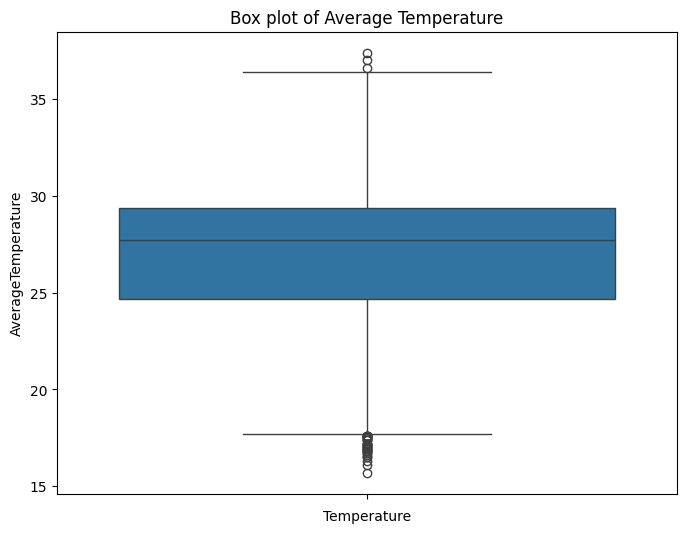

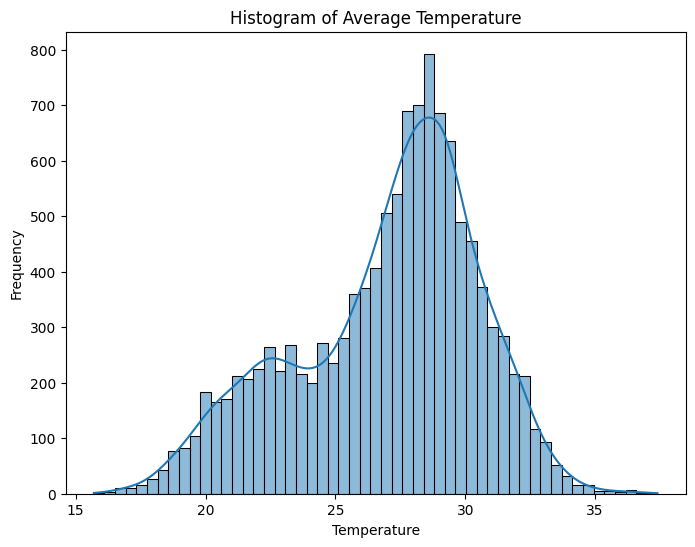

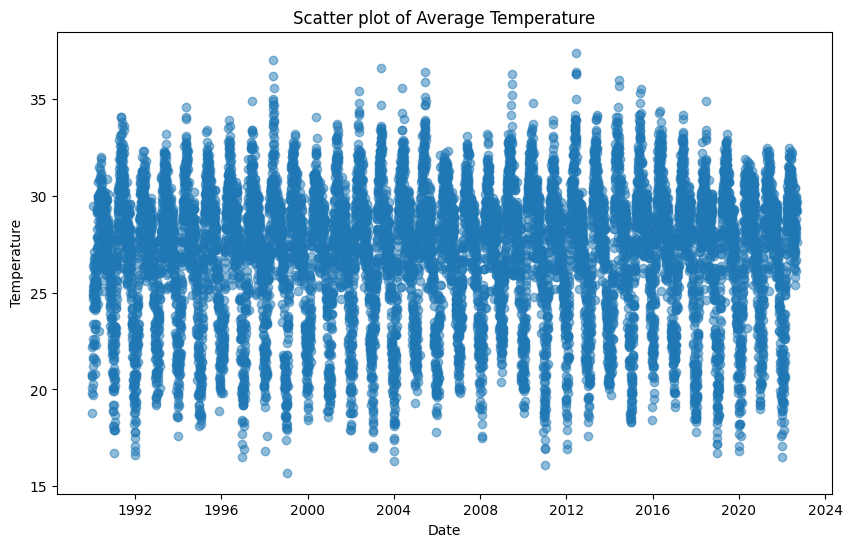

In [137]:

# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=data['AverageTemperature'])
plt.title('Box plot of Average Temperature')
plt.xlabel('Temperature')
plt.show()

# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=data['AverageTemperature'], kde=True)
plt.title('Histogram of Average Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Scatter plot (with index as x-axis)
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['AverageTemperature'], alpha=0.5)
plt.title('Scatter plot of Average Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

In [139]:
Total = data.isnull().sum().sort_values(ascending = False)    

In [140]:
Percent = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending = False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
AverageTemperature,78,0.65354
z_score,78,0.65354


In [141]:
mean_temp = data['AverageTemperature'].mean()

# Replace missing values with the mean
data['AverageTemperature'] = data['AverageTemperature'].fillna(mean_temp)
data

,AverageTemperature,z_score
Date,,
1990-01-01,20.1,-1.952046
1990-01-02,20.7,-1.782096
1990-01-03,20.7,-1.782096
1990-01-04,18.8,-2.320270
1990-01-05,19.8,-2.037020
...,...,...
2022-08-31,29.2,0.625523
2022-09-01,29.6,0.738823
2022-09-02,29.7,0.767148


In [142]:
data.index = pd.to_datetime(data.index)

# Resample the data to monthly frequency and take the mean temperature for each month
data = data.resample('ME').mean()

# Drop any rows with missing values (if any)
data.dropna(inplace=True)

# Display the resulting DataFrame
data

,AverageTemperature,z_score
Date,,
1990-01-31,23.158065,-1.085851
1990-02-28,24.771429,-0.628867
1990-03-31,26.202955,-0.230834
1990-04-30,28.646667,0.468792
1990-05-31,28.630365,0.599558
...,...,...
2022-05-31,30.154839,0.895980
2022-06-30,29.906667,0.825686
2022-07-31,28.264516,0.360548


In [143]:
Total = data.isnull().sum().sort_values(ascending = False)    

In [144]:
Percent = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending = False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
AverageTemperature,0,0.0
z_score,0,0.0


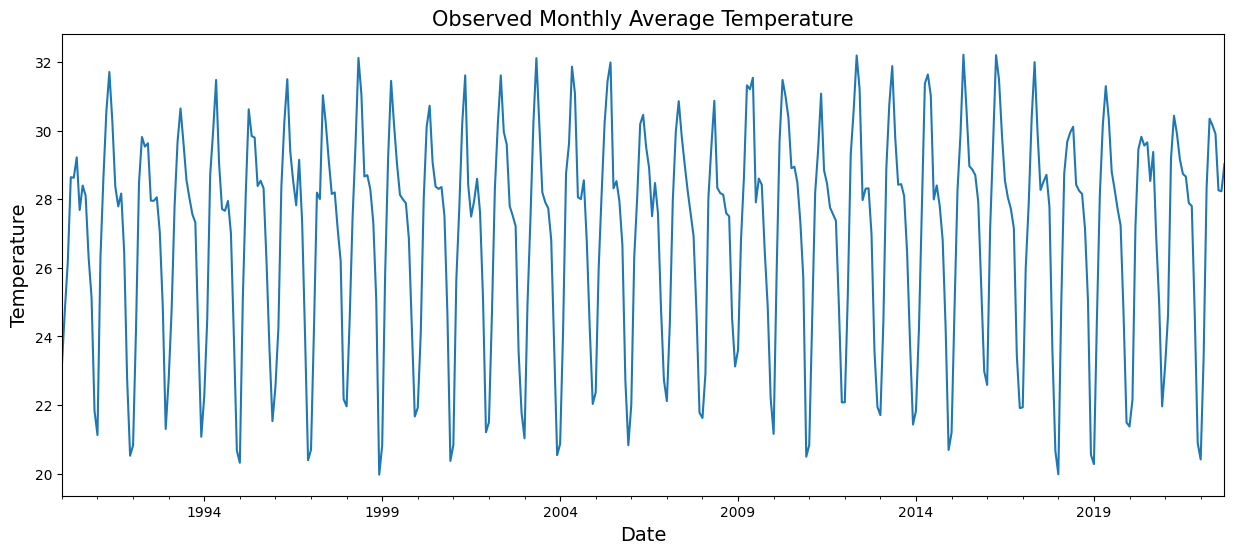

In [145]:
data=data.drop(['z_score'], axis=1)
data.plot(figsize = (15, 6), legend = None)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Temperature', fontsize = 14)
plt.title('Observed Monthly Average Temperature', fontsize = 15)
plt.show()

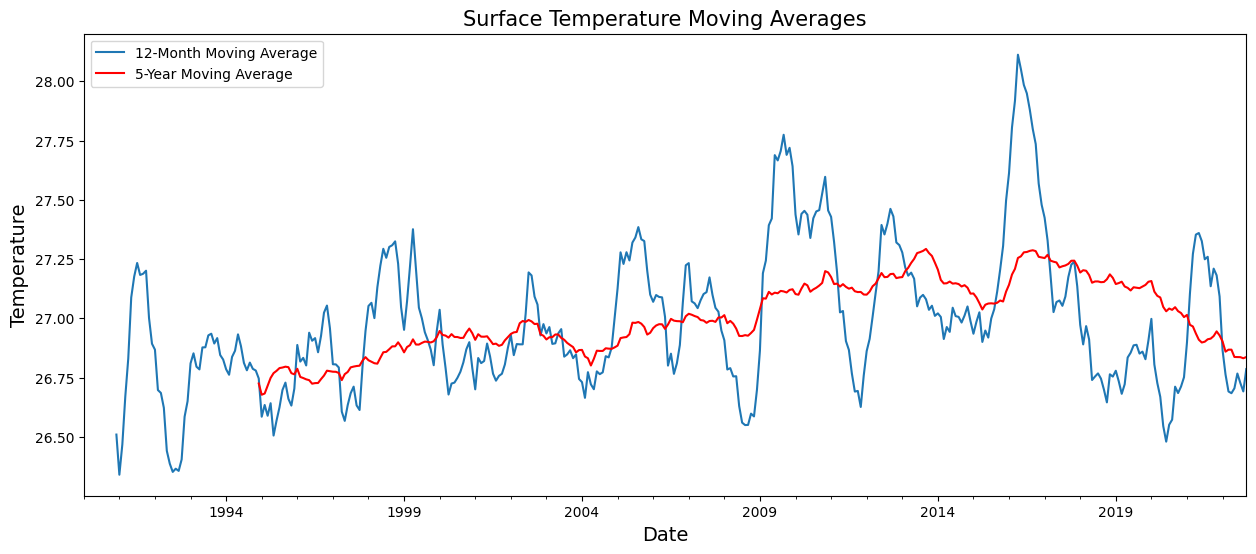

In [146]:
yearly = data['AverageTemperature'].rolling(window = 12).mean()
fiveyearly = data['AverageTemperature'].rolling(window = 60).mean()
MAax = yearly['1975':].plot(figsize = (15, 6), label = '12-Month Moving Average')
fiveyearly['1975':].plot(ax = MAax, color = 'red', label = '5-Year Moving Average')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Temperature', fontsize = 14)
plt.title('Surface Temperature Moving Averages', fontsize = 15)
plt.legend()
plt.show()

In [93]:
pip install statsmodels

  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/9a/b2/13833f94076dcc2709137fee92157ef5a0099a11ddff4f4b7cb301b35357/statsmodels-0.14.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for patsy>=0.5.4 from https://files.pythonhosted.org/packages/43/f3/1d311a09c34f14f5973bb0bb0dc3a6e007e1eda90b5492d082689936ca51/patsy-0.5.6-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.9 MB 657.6 kB/s eta 0:00:15
   ---------------------------------------- 0.1/9.9 MB 726.2 kB/s eta 0:00:14
    --------------------------------------- 0.2/9.9 MB 958.4 kB/s eta 0:00:11
    --------------------------------------- 0.2/9.9 MB 1.1 MB/s eta 0:00:09
   - -------------------------------------- 0.4/9.9 MB 1.4 M

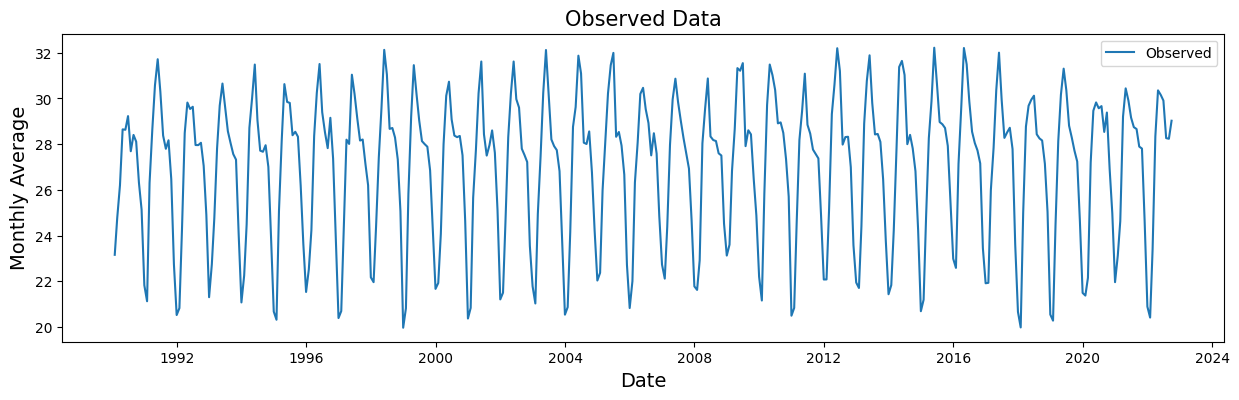

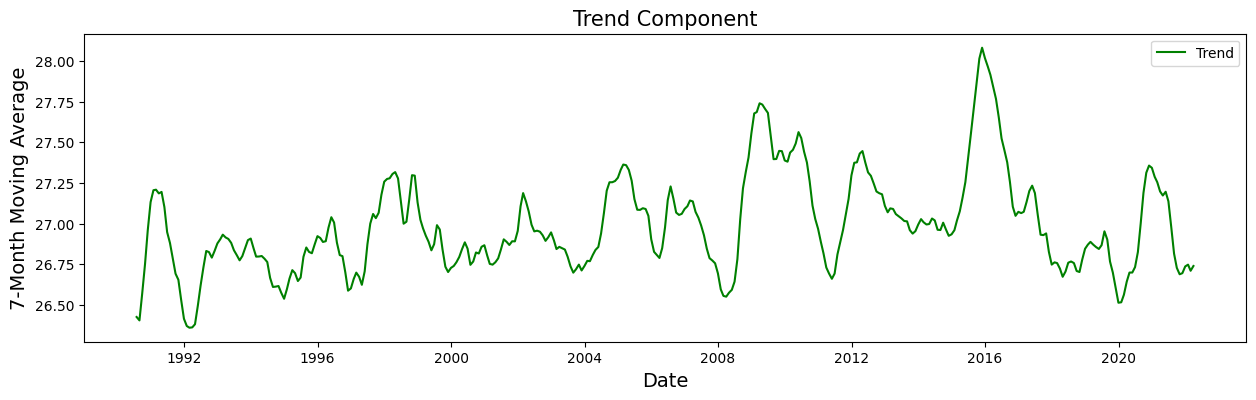

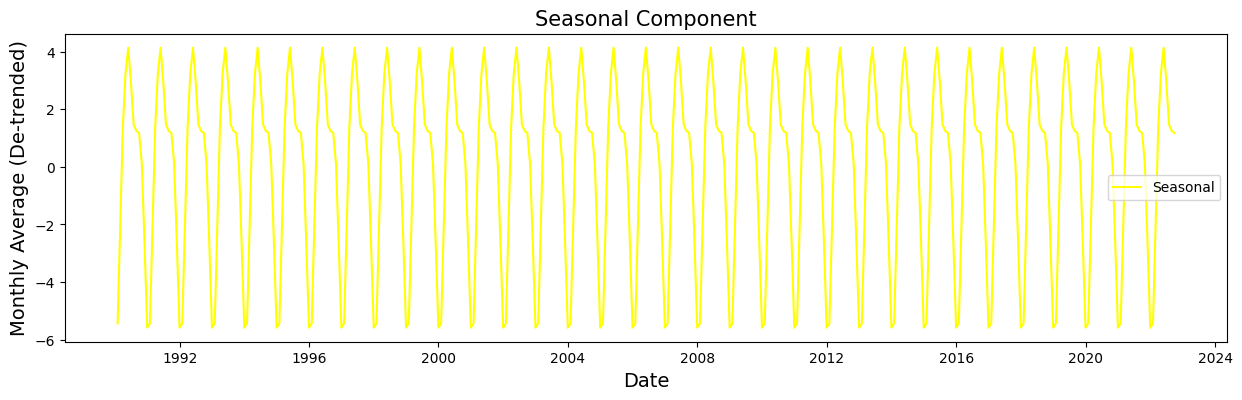

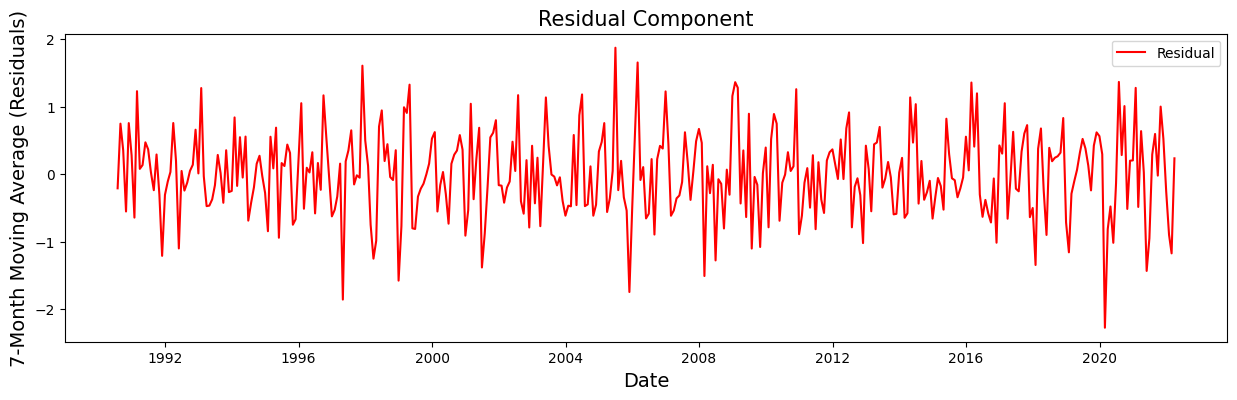

In [147]:
from statsmodels.tsa.seasonal import seasonal_decompose

#Decomposing the time series:
decomposition = seasonal_decompose(data)

#Plotting the observed values:
observed = decomposition.observed
plt.figure(figsize = (15, 4))
plt.plot(observed, label = 'Observed')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Monthly Average', fontsize = 14)
plt.legend(loc = 'best')
plt.title("Observed Data", fontsize = 15)
plt.show()

#Plotting the trend component:
trend = decomposition.trend
plt.figure(figsize = (15, 4))
plt.plot(trend, label = 'Trend', color = 'green')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('7-Month Moving Average', fontsize = 14)
plt.legend(loc = 'best')
plt.title("Trend Component", fontsize = 15)
plt.show()

#Plotting the seasonal component:
seasonal = decomposition.seasonal
plt.figure(figsize = (15, 4))
plt.plot(seasonal, label = 'Seasonal', color = 'yellow')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Monthly Average (De-trended)', fontsize = 14)
plt.legend(loc = 'best')
plt.title("Seasonal Component", fontsize = 15)
plt.show()

#Plotting the residual component:
residual = decomposition.resid
plt.figure(figsize = (15, 4))
plt.plot(residual, label = 'Residual', color = 'red')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('7-Month Moving Average (Residuals)', fontsize = 14)
plt.legend(loc = 'best')
plt.title("Residual Component", fontsize = 15)
plt.show()

In [148]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','No. of Lags Used',
                                             'Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
adf_test(data)

Results of Dickey-Fuller Test:
Test Statistic                  -5.121912
p-value                          0.000013
No. of Lags Used                15.000000
Number of Observations Used    377.000000
Critical Value (1%)             -3.447815
Critical Value (5%)             -2.869237
Critical Value (10%)            -2.570870
dtype: float64


In [149]:
from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression = 'c', nlags = 'legacy')
    kpss_output = pd.Series(kpsstest[0:3], index = ['Test Statistic','p-value','No. of Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
    
kpss_test(data)

Results of KPSS Test:
Test Statistic            0.101696
p-value                   0.100000
No. of Lags Used         17.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\KIIT\AppData\Local\Temp\ipykernel_16704\282998701.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression = 'c', nlags = 'legacy')


In [150]:
y = data['AverageTemperature'].resample('MS').mean()
y.head()

Date
1990-01-01    23.158065
1990-02-01    24.771429
1990-03-01    26.202955
1990-04-01    28.646667
1990-05-01    28.630365
Freq: MS, Name: AverageTemperature, dtype: float64

In [151]:
train = y[:'2015']
test = y['2016':]

In [153]:
pip install pmdarima

  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ac/f8/6c9364602b13f0dba129b53acd1344859690911a4d5021560d9fd6aa087f/pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/20/50/638cbeb5b202b39d0605f6170fe25ed75287152827b0282d64135995b32b/Cython-3.0.9-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/614.7 kB ? et

In [154]:
from pmdarima.arima import auto_arima

#The default values of several important parameters for auto_arima function are as follows:
#max_p=5, max_d=2, max_q=5, max_P=2, max_D=1, max_Q=2

arima_model = auto_arima(train, seasonal = True, m = 12, stepwise = False, trace = 1, random_state = 10)

 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1604.882, Time=0.06 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1343.648, Time=0.22 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=1200.791, Time=0.85 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.94 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=937.595, Time=1.34 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=1001.631, Time=2.55 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=3.34 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=2.13 sec
 ARIMA(0,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=2.29 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1347.018, Time=0.06 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1189.305, Time=0.31 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=1097.478, Time=0.70 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=908.182, Time=0.69 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=887.424, Time=1.04 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=933.754, Time=2.20 sec
 ARIMA(0,0,1)(2,0,0

In [155]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(train, order = (1, 0, 0), seasonal_order = (1, 0, 1, 12), 
                                  enforce_stationarity = False, enforce_invertibility = False)
fitted_model = model.fit(maxiter = 200, method = 'nm')
print(fitted_model.summary())

Optimization terminated successfully.
         Current function value: 1.049347
         Iterations: 167
         Function evaluations: 274
                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                  312
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -327.396
Date:                              Sun, 24 Mar 2024   AIC                            662.792
Time:                                      18:36:51   BIC                            677.594
Sample:                                  01-01-1990   HQIC                           668.717
                                       - 12-01-2015                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------

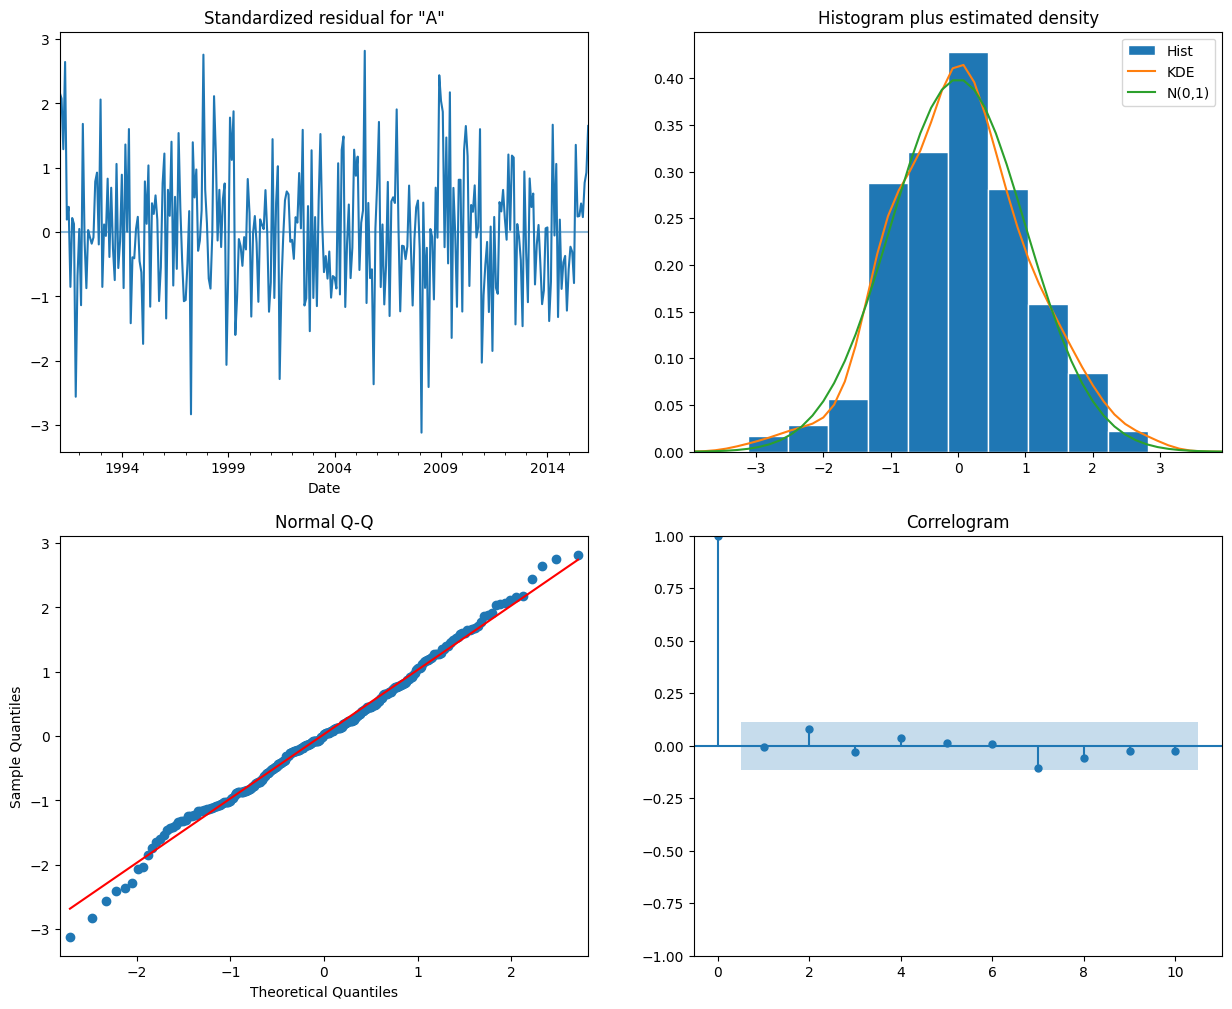

In [156]:
fitted_model.plot_diagnostics(figsize = (15, 12))
plt.show()

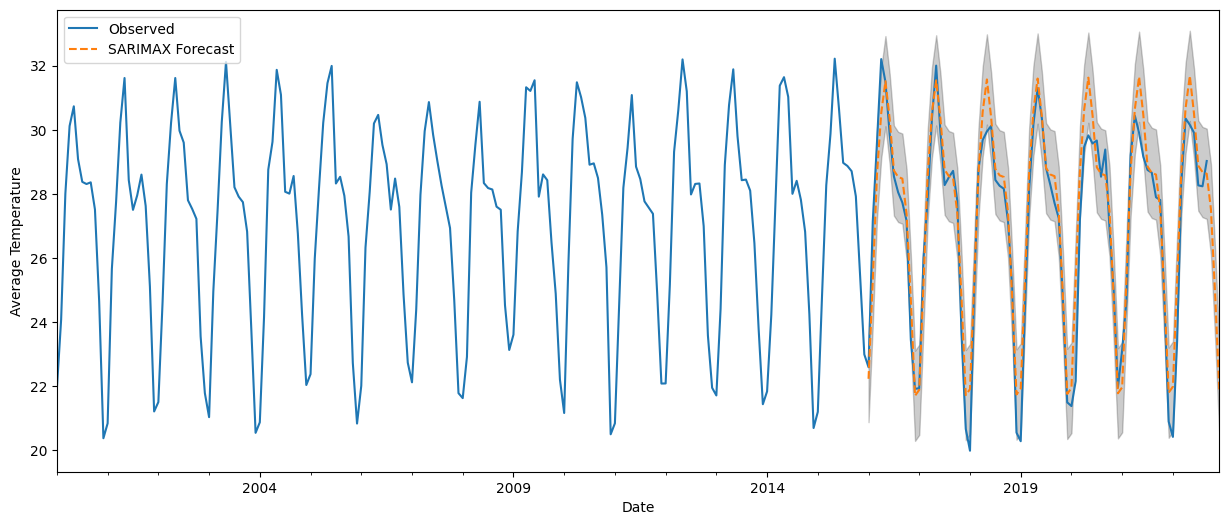

In [163]:

#Getting the SARIMAX forecast with number of steps as 36 since we want to make 4 year prediction and our data is monthly sampled.
pred = fitted_model.get_forecast(steps = 84)
#Plotting the observed and forecasted values:
ax1 = y['2000':].plot(label = 'Observed')
pred.predicted_mean.plot(ax = ax1, label = 'SARIMAX Forecast', figsize = (15, 6), linestyle = 'dashed')
#Finding the confidence intervals of the forecasts.
pred_ci = pred.conf_int()
ax1.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Temperature')
plt.legend(loc = 'upper left')
plt.show()

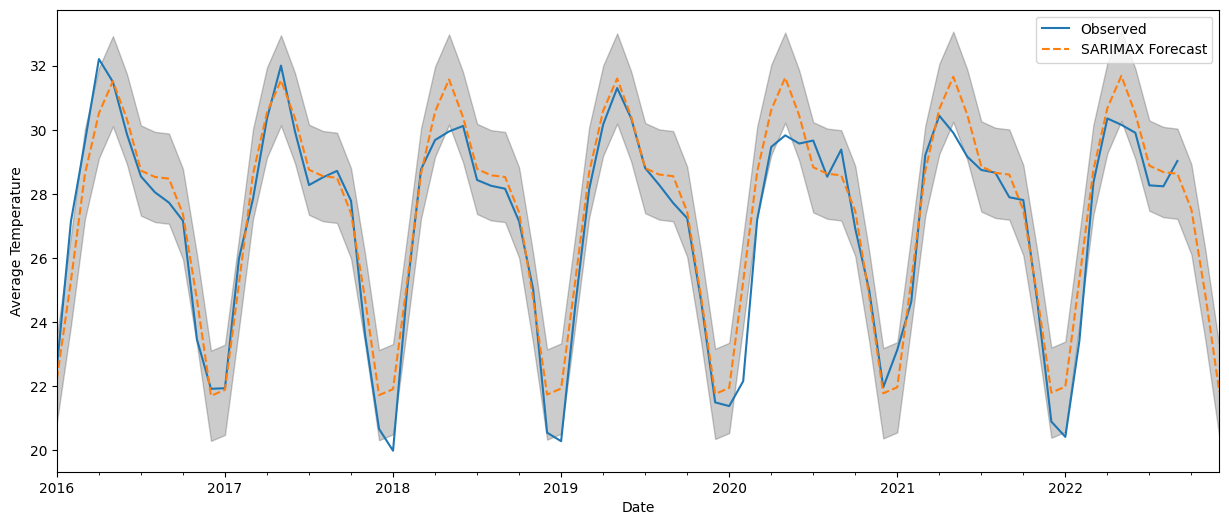

In [164]:
#Plotting the observed and forecasted values:
ax2 = y['2016':].plot(label = 'Observed')
pred.predicted_mean.plot(ax = ax2, label = 'SARIMAX Forecast', figsize = (15, 6), linestyle = 'dashed')
#Finding the confidence intervals of the forecasts.
pred_ci = pred.conf_int()
ax2.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax2.set_xlabel('Date')
ax2.set_ylabel('Average Temperature')
plt.legend()
plt.show()

In [165]:
y_forecasted_SARIMAX = pred.predicted_mean
y_truth = test
mse_SARIMAX = ((y_forecasted_SARIMAX - y_truth) ** 2).mean()
print('The Mean Squared Error of SARIMAX forecast is {}'.format(round(mse_SARIMAX, 2)))
print('The Root Mean Squared Error of SARIMAX forecast is {}'.format(round(np.sqrt(mse_SARIMAX), 2)))

The Mean Squared Error of SARIMAX forecast is 0.81
The Root Mean Squared Error of SARIMAX forecast is 0.9


In [166]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled = scaler.fit_transform(np.array(train).reshape(-1, 1))

In [168]:
from keras.preprocessing.sequence import TimeseriesGenerator

window_size = 60  # This is the size of the sliding window

train_generator = TimeseriesGenerator(train_scaled, 
                                      train_scaled, 
                                      length=window_size, 
                                      batch_size=1)

In [170]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(100, input_shape=(window_size, 1), return_sequences=True),
    tf.keras.layers.LSTM(50, return_sequences=True),
    tf.keras.layers.LSTM(10),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [172]:
# Compile your model
model.compile(loss='mse', optimizer='adam')

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 60, 100)           40800     
                                                                 
 lstm_4 (LSTM)               (None, 60, 50)            30200     
                                                                 
 lstm_5 (LSTM)               (None, 10)                2440      
                                                                 
 dense_3 (Dense)             (None, 64)                704       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 76257 (297.88 KB)
Trainable params: 7625

In [173]:

from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(r"C:\Vishnu Vardhan\CS\Data Science\Imarticus Data Analytics & ML\Projects\Chennai Surface Temperature Forecasting\models\TemperatureForecastingModel.h5", 
                             monitor = 'loss', save_best_only = True)

In [ ]:
import random as rd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
import logging
logging.getLogger('tensorflow').disabled = True

# Set random seeds
rd.seed(10)
np.random.seed(150)
tf.random.set_seed(150)

# Assuming 'checkpoint' is defined elsewhere
history = model.fit(train_generator, epochs=100, callbacks=[checkpoint])

Epoch 1/100
252/252 [==============================] - 15s 50ms/step - loss: 0.4001
Epoch 2/100
  1/252 [..............................] - ETA: 15s - loss: 0.3959

C:\Users\KIIT\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


252/252 [==============================] - 10s 41ms/step - loss: 0.1615
Epoch 3/100
252/252 [==============================] - 10s 41ms/step - loss: 0.1093
Epoch 4/100
252/252 [==============================] - 11s 45ms/step - loss: 0.0987
Epoch 5/100
252/252 [==============================] - 11s 42ms/step - loss: 0.0911
Epoch 6/100
252/252 [==============================] - 11s 42ms/step - loss: 0.1018
Epoch 7/100
252/252 [==============================] - 10s 41ms/step - loss: 0.0845
Epoch 8/100
252/252 [==============================] - 11s 42ms/step - loss: 0.0763
Epoch 9/100
252/252 [==============================] - 10s 41ms/step - loss: 0.0852
Epoch 10/100
252/252 [==============================] - 11s 45ms/step - loss: 0.0732
Epoch 11/100
252/252 [==============================] - 12s 49ms/step - loss: 0.0863
Epoch 12/100
252/252 [==============================] - 11s 44ms/step - loss: 0.0729
Epoch 13/100
252/252 [==============================] - 11s 43ms/step - loss: 0.0741
